In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


car_data_raw = pd.read_csv("https://cdn.c18l.org/vehicles_lab.csv")

In [2]:
car_data= pd.concat([
    pd.read_csv("https://cdn.c18l.org/vehicles_lab.csv")
]).reset_index(drop=True)
car_data.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
0,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.5920,-85.518900,2021-05-03T14:02:03-0500
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,NaN,pickup,black,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T13:41:25-0500
2,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,NaN,pickup,silver,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T12:41:33-0500
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,NaN,truck,grey,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,al,32.6013,-85.443974,2021-05-03T12:12:59-0500
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T11:31:14-0500


In [3]:
data=car_data.loc[:,[
    "year", "condition","odometer","title_status",
    "manufacturer", "description", "price"
]]
data

,year,condition,odometer,title_status,manufacturer,description,price
0,2013.0,excellent,128000.0,clean,ford,2013 F-150 XLT V6 4 Door. Good condition. Leve...,15000
1,2012.0,good,68696.0,clean,gmc,Carvana is the safer way to buy a car During t...,27990
2,2016.0,good,29499.0,clean,chevrolet,Carvana is the safer way to buy a car During t...,34590
3,2019.0,excellent,43000.0,clean,toyota,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,35000
4,2016.0,good,17302.0,clean,chevrolet,Carvana is the safer way to buy a car During t...,29990
...,...,...,...,...,...,...,...
192651,2017.0,good,37608.0,clean,NaN,Carvana is the safer way to buy a car During t...,25590
192652,2016.0,good,55612.0,clean,infiniti,Carvana is the safer way to buy a car During t...,32990
192653,2018.0,good,30814.0,clean,lexus,Carvana is the safer way to buy a car During t...,33590
192654,2019.0,good,32226.0,clean,nissan,Carvana is the safer way to buy a car During t...,23590


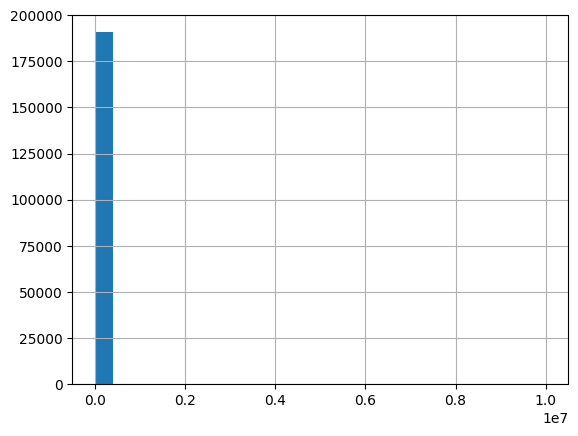

In [4]:
#Part 2
data["odometer"].hist(bins=25)
data["is_carvana"]=data["description"].str.contains("Carvana")

In [5]:
#removing not clean titles:
data=data[data["title_status"].str.contains("clean")==True]
data.head()


,year,condition,odometer,title_status,manufacturer,description,price,is_carvana
0,2013.0,excellent,128000.0,clean,ford,2013 F-150 XLT V6 4 Door. Good condition. Leve...,15000,False
1,2012.0,good,68696.0,clean,gmc,Carvana is the safer way to buy a car During t...,27990,True
2,2016.0,good,29499.0,clean,chevrolet,Carvana is the safer way to buy a car During t...,34590,True
3,2019.0,excellent,43000.0,clean,toyota,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,35000,False
4,2016.0,good,17302.0,clean,chevrolet,Carvana is the safer way to buy a car During t...,29990,True


In [6]:
#we want a car that is in excellent or good condition

In [7]:
#we dont want a car with over 200,000 miles and no cars with 0 miles
data=data.loc[data["odometer"]<=200000]
data=data.loc[data["odometer"]>0]
data

,year,condition,odometer,title_status,manufacturer,description,price,is_carvana
0,2013.0,excellent,128000.0,clean,ford,2013 F-150 XLT V6 4 Door. Good condition. Leve...,15000,False
1,2012.0,good,68696.0,clean,gmc,Carvana is the safer way to buy a car During t...,27990,True
2,2016.0,good,29499.0,clean,chevrolet,Carvana is the safer way to buy a car During t...,34590,True
3,2019.0,excellent,43000.0,clean,toyota,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,35000,False
4,2016.0,good,17302.0,clean,chevrolet,Carvana is the safer way to buy a car During t...,29990,True
...,...,...,...,...,...,...,...,...
192651,2017.0,good,37608.0,clean,NaN,Carvana is the safer way to buy a car During t...,25590,True
192652,2016.0,good,55612.0,clean,infiniti,Carvana is the safer way to buy a car During t...,32990,True
192653,2018.0,good,30814.0,clean,lexus,Carvana is the safer way to buy a car During t...,33590,True
192654,2019.0,good,32226.0,clean,nissan,Carvana is the safer way to buy a car During t...,23590,True


In [8]:
#Remove inconsistencies in manufacturer
data=data[data["manufacturer"].str.contains("NaN")==False]
data

,year,condition,odometer,title_status,manufacturer,description,price,is_carvana
0,2013.0,excellent,128000.0,clean,ford,2013 F-150 XLT V6 4 Door. Good condition. Leve...,15000,False
1,2012.0,good,68696.0,clean,gmc,Carvana is the safer way to buy a car During t...,27990,True
2,2016.0,good,29499.0,clean,chevrolet,Carvana is the safer way to buy a car During t...,34590,True
3,2019.0,excellent,43000.0,clean,toyota,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,35000,False
4,2016.0,good,17302.0,clean,chevrolet,Carvana is the safer way to buy a car During t...,29990,True
...,...,...,...,...,...,...,...,...
192650,2017.0,good,41664.0,clean,infiniti,Carvana is the safer way to buy a car During t...,39990,True
192652,2016.0,good,55612.0,clean,infiniti,Carvana is the safer way to buy a car During t...,32990,True
192653,2018.0,good,30814.0,clean,lexus,Carvana is the safer way to buy a car During t...,33590,True
192654,2019.0,good,32226.0,clean,nissan,Carvana is the safer way to buy a car During t...,23590,True


In [9]:
 #Part 3

 temp = pd.get_dummies(data["condition"], dummy_na=True).astype(int)
 temp.head()


 #get_dummies() function creates dummy (indicator) variables from categorical variables.
 #Each level of the categorical variable gets its own column - a dummy variable. The dummy variables take on the value “1”
 #if the original categorical variable was that level or “0” if not.

,excellent,fair,good,like new,new,salvage,NaN
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0


In [10]:
n_temp=pd.get_dummies(data["title_status"], dummy_na =True).astype(int)
n_temp

,clean,NaN
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
192650,1,0
192652,1,0
192653,1,0
192654,1,0


In [11]:
new_data=pd.concat([data,temp,n_temp], axis=1)
new_data.head()

,year,condition,odometer,title_status,manufacturer,description,price,is_carvana,excellent,fair,good,like new,new,salvage,NaN,clean,NaN
0,2013.0,excellent,128000.0,clean,ford,2013 F-150 XLT V6 4 Door. Good condition. Leve...,15000,False,1,0,0,0,0,0,0,1,0
1,2012.0,good,68696.0,clean,gmc,Carvana is the safer way to buy a car During t...,27990,True,0,0,1,0,0,0,0,1,0
2,2016.0,good,29499.0,clean,chevrolet,Carvana is the safer way to buy a car During t...,34590,True,0,0,1,0,0,0,0,1,0
3,2019.0,excellent,43000.0,clean,toyota,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,35000,False,1,0,0,0,0,0,0,1,0
4,2016.0,good,17302.0,clean,chevrolet,Carvana is the safer way to buy a car During t...,29990,True,0,0,1,0,0,0,0,1,0


In [12]:
new_data["price_bin"]=(new_data["price"])
new_data


,year,condition,odometer,title_status,manufacturer,description,price,is_carvana,excellent,fair,good,like new,new,salvage,NaN,clean,NaN,price_bin
0,2013.0,excellent,128000.0,clean,ford,2013 F-150 XLT V6 4 Door. Good condition. Leve...,15000,False,1,0,0,0,0,0,0,1,0,15000
1,2012.0,good,68696.0,clean,gmc,Carvana is the safer way to buy a car During t...,27990,True,0,0,1,0,0,0,0,1,0,27990
2,2016.0,good,29499.0,clean,chevrolet,Carvana is the safer way to buy a car During t...,34590,True,0,0,1,0,0,0,0,1,0,34590
3,2019.0,excellent,43000.0,clean,toyota,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,35000,False,1,0,0,0,0,0,0,1,0,35000
4,2016.0,good,17302.0,clean,chevrolet,Carvana is the safer way to buy a car During t...,29990,True,0,0,1,0,0,0,0,1,0,29990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192650,2017.0,good,41664.0,clean,infiniti,Carvana is the safer way to buy a car During t...,39990,True,0,0,1,0,0,0,0,1,0,39990
192652,2016.0,good,55612.0,clean,infiniti,Carvana is the safer way to buy a car During t...,32990,True,0,0,1,0,0,0,0,1,0,32990
192653,2018.0,good,30814.0,clean,lexus,Carvana is the safer way to buy a car During t...,33590,True,0,0,1,0,0,0,0,1,0,33590
192654,2019.0,good,32226.0,clean,nissan,Carvana is the safer way to buy a car During t...,23590,True,0,0,1,0,0,0,0,1,0,23590


In [13]:
#pd.cut(new_data.price_bin,
 #   bins=np.linspace(0,500000,3+1)
#)
bins = np.linspace(0, 500000, 3 + 1)
new_data['price_bin'] = pd.cut(new_data['price'], bins)
bins

array([     0.        , 166666.66666667, 333333.33333333, 500000.        ])

In [14]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(new_data, test_size=0.2)
train_df.head()


,year,condition,odometer,title_status,manufacturer,description,price,is_carvana,excellent,fair,good,like new,new,salvage,NaN,clean,NaN,price_bin
117641,2017.0,NaN,118010.0,clean,ford,"2017 *Ford* *Transit Van* T-150 130"" Med Rf 86...",27900,False,0,0,0,0,0,0,1,1,0,"(0.0, 166666.667]"
133852,2018.0,NaN,48335.0,clean,volkswagen,This 2018 Volkswagen Atlas SEL has been SOLD b...,30000,False,0,0,0,0,0,0,1,1,0,"(0.0, 166666.667]"
61521,2007.0,excellent,85600.0,clean,audi,Up for sale here is a 2007 Audi S4 Quattro Cab...,16498,False,1,0,0,0,0,0,0,1,0,"(0.0, 166666.667]"
67718,2001.0,fair,100000.0,clean,ram,green 15 passenger van NOT running FOR SALE cl...,1000,False,0,1,0,0,0,0,0,1,0,"(0.0, 166666.667]"
175226,2014.0,good,105724.0,clean,chevrolet,PLEASE VIEW THE FREE CARFAX HISTORY REPORT AT ...,13498,False,0,0,1,0,0,0,0,1,0,"(0.0, 166666.667]"


In [15]:
threshold = 1.0

train_df['price_bin'] = (train_df["price"] > threshold).astype(float)
test_df['price_bin'] = (test_df["price"] > threshold)



In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [17]:
train_data, test_data = train_test_split(
    new_data,
    train_size=0.8,
    random_state=42
)
model = LinearRegression()
model.fit(
    X=train_data.loc[:, ["odometer", "year", "excellent", "fair", "good", "like new", "new", "salvage"]],
    y=train_data["price"]
)


LinearRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(
    new_data,
    train_size=0.8,
    random_state=42
)
model = LogisticRegression(multi_class="multinomial")
model.fit(
    X=train_data.loc[:, ["odometer", "year", "excellent", "fair", "good", "like new", "new", "salvage"]],
    y=train_data["price"],

)